   # IMPLEMENTING MLPCLASSIFIER ALGORITHM

In [1]:
#import library packages
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load given dataset
data = pd.read_csv("heart.csv")

In [4]:
df = data.dropna()

In [5]:
del df['Age.Group']
del df['Locality']
del df['Gender']

In [6]:
df.columns

Index(['Age', 'Marital_status', 'Sleep', 'Depression', 'Smoking', 'Diabetes',
       'BP', 'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'Mortality'],
      dtype='object')

In [7]:
df.head()

,Age,Marital_status,Sleep,Depression,Smoking,Diabetes,BP,Hypersensitivity,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Mortality
0,45,MARRIED,NO,YES,NO,1,100.6,NO,4,132,341,1,2,136,1,3.0,2,0,7,0
1,51,MARRIED,NO,YES,NO,0,90.6,NO,4,130,305,0,0,142,1,1.2,2,0,7,0
2,55,MARRIED,YES,YES,NO,1,100.7,NO,4,180,327,0,1,117,1,3.4,2,0,3,0
3,55,MARRIED,YES,YES,NO,1,160.1,NO,4,128,205,0,1,130,1,2.0,2,1,7,0
4,56,MARRIED,NO,YES,NO,1,90.6,NO,4,200,288,1,2,133,1,4.0,3,2,7,0


In [8]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Marital_status', 'Sleep', 'Depression', 'Smoking', 'Hypersensitivity']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [9]:
df.head()

,Age,Marital_status,Sleep,Depression,Smoking,Diabetes,BP,Hypersensitivity,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Mortality
0,45,0,0,1,0,1,100.6,0,4,132,341,1,2,136,1,3.0,2,0,7,0
1,51,0,0,1,0,0,90.6,0,4,130,305,0,0,142,1,1.2,2,0,7,0
2,55,0,1,1,0,1,100.7,0,4,180,327,0,1,117,1,3.4,2,0,3,0
3,55,0,1,1,0,1,160.1,0,4,128,205,0,1,130,1,2.0,2,1,7,0
4,56,0,0,1,0,1,90.6,0,4,200,288,1,2,133,1,4.0,3,2,7,0


In [10]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='Mortality', axis=1)
#Response variable
y = df.loc[:,'Mortality']  

In [11]:
#Splitting for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  257
Number of test dataset:  111
Total number of dataset:  368


##### Implementing MLPClassifier Algo

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay


Training

In [14]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
predicted = mlp.predict(X_test)

Finding Accuracy

In [15]:
accuracy = accuracy_score(y_test,predicted)
print('Accuracy of MLPClassifier',accuracy*100)

Accuracy of MLPClassifier 75.67567567567568


Finding Clasiification Report

In [16]:
cr = classification_report(y_test,predicted)
print('Classification report\n\n',cr)

Classification report

               precision    recall  f1-score   support

           0       0.79      0.94      0.86        87
           1       0.29      0.08      0.13        24

    accuracy                           0.76       111
   macro avg       0.54      0.51      0.49       111
weighted avg       0.68      0.76      0.70       111



Finding Confusion matrix

In [17]:
cm = confusion_matrix(y_test,predicted)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[82  5]
 [22  2]]


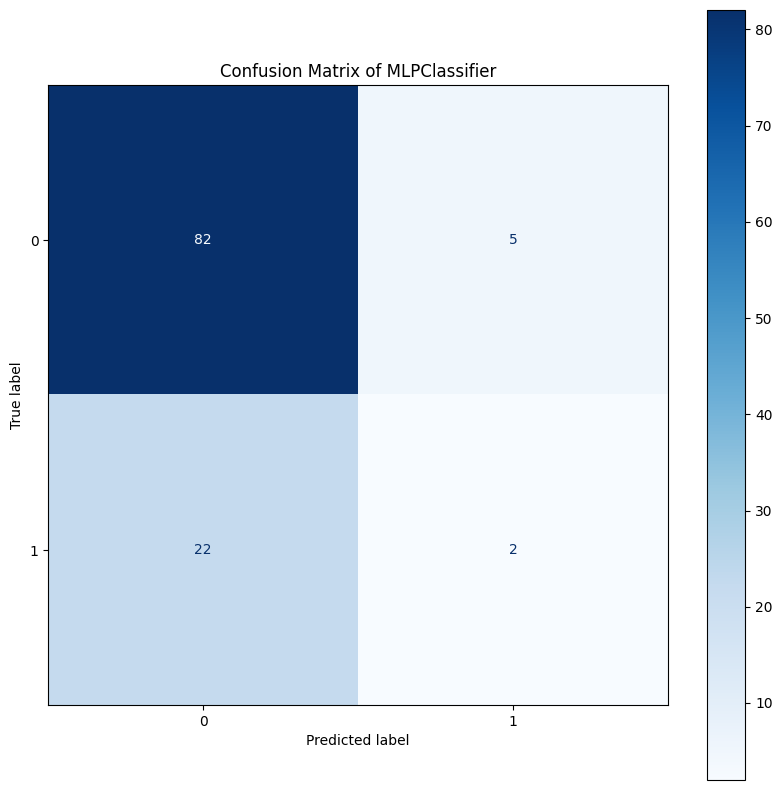

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot confusion matrix using the trained MLPClassifier
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test, ax=ax, cmap='Blues')
plt.title('Confusion Matrix of MLPClassifier')
plt.show()


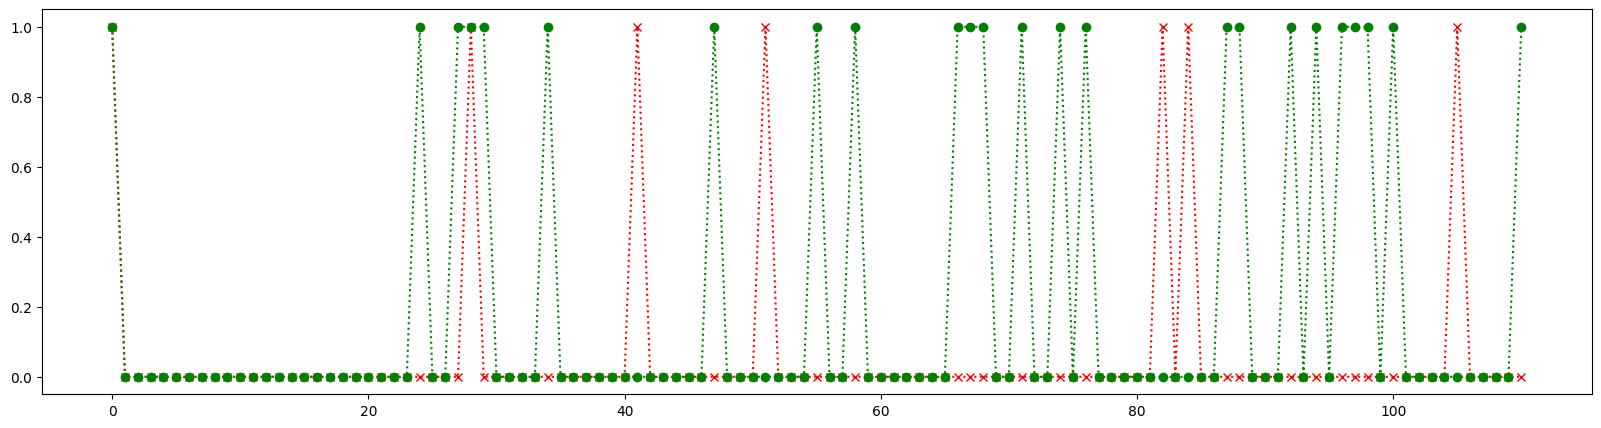

In [20]:
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"], marker='x', linestyle='dotted', color='red')
plt.plot(df2["y_test"],  marker='o', linestyle='dotted', color='green')
plt.show()